# **Análise Exploratória de Dados**
**Projeto Aplicado 1 - Grupo Nave:**

AMANDA SCHWANTES MAIA TIA: 10922519963

ELAINE THAMIRES PEREIRA TIA 10922517650

GIOVANA VIEIRA DA SILVA TIA 10922520791

IAGO FONSECA MARINHO PEREIRA TIA 10922500138

MURILO GUIMARÃES TIA 10922505458

**Github**: https://github.com/NaveProjetoI/Projeto-Aplicado-I

**Pipeline:**

Importação de bibliotecas

Importação dataset

Verificação do Dataset

Distribuição de Frequência (Atributos Categóricos)

Transformação de NA's

Preparação dos dados (classificação e transformação de dados)

Sumarização e Medidas de Centralidade (Média, Mediana e Moda)

Medidas de Dispersão (Variância, Desvio padrão, Percentis e Quartis)

Escore Padrão e Identificação de Outliers.







**Importação de bibliotecas**

In [2]:
# Importação das bibliotecas que serão utilizadas.
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt



**Importação do dataset**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NaveProjetoI/Projeto-Aplicado-I/main/Dataset/dataset.csv') # Leitura do dataset.
df.head(5) # Visualização das primeiras 5 linhas.

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [4]:
df.tail(5) # Visualização das últimas 5 linhas.

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation
31755,Uzbekistan,2017,female,75+ years,3.0,32388600,0.009263,Uzbekistan2017,0.691258,62081323299,1916.764642,G.I. Generation


**Verificação do Dataset**

In [5]:
df.describe().applymap(lambda x:'{:.2f}'.format(x)) # Descrição dos atributos quantitativos

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.00,30556.00,31756.00,31756.00,12300.00,31756.00
mean,2003.40,237.14,7217454.24,11.72,0.79,17588.95
std,9.76,867.96,57993230.36,21.59,0.10,19464.86
min,1985.00,0.00,278.00,0.00,0.38,251.00
25%,1996.00,3.00,128821.00,0.37,0.73,3765.00
50%,2004.00,25.00,546832.50,4.29,0.80,10062.00
75%,2011.00,132.00,2908763.00,14.56,0.87,25622.00
max,2020.00,22338.00,1411100000.00,515.09,0.98,126352.00


In [6]:
df.info() # Informações úteis sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [7]:
print('A base de dados apresenta {} registros e {} variáveis'.format(df.shape[0], df.shape[1])) # Total de linhas e colunas do Dataset.

A base de dados apresenta 31756 registros e 12 variáveis


**Distribuição de Frequência (Atributos categóricos)**

In [8]:
df.value_counts('country') # Distribuição de Frequência, atributo "country"

country
Mauritius                 430
Iceland                   430
Austria                   430
Netherlands               430
Spain                     420
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Macau                      12
Cabo Verde                 12
Mongolia                   10
Length: 114, dtype: int64

In [9]:
df.value_counts('year') # Distribuição de Frequência, atributo "year"

year
2009    1068
2001    1056
2010    1056
2003    1032
2011    1032
2007    1032
2002    1032
2000    1032
2008    1020
2006    1020
2005    1008
2004    1008
1999     996
2019     984
2018     984
2017     984
2020     984
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
dtype: int64

In [10]:
df.value_counts('sex') # Distribuição de Frequência, atributo "sex"

sex
female    15878
male      15878
dtype: int64

In [11]:
df.value_counts('generation') # Distribuição de Frequência, atributo "generation"

generation
Generation X       7720
Silent             7020
Millenials         5844
Boomers            5646
G.I. Generation    4056
Generation Z       1470
dtype: int64

In [12]:
df.value_counts('age') # Distribuição de Frequência, atributo "age"

age
15-24 years    5298
25-34 years    5298
35-54 years    5298
55-74 years    5298
75+ years      5298
5-14 years     5266
dtype: int64

**Transformação de NA's** 


In [13]:
df.isnull().any() # Verificação boleana de prensença de NA's em cada atributo.

country               False
year                  False
sex                   False
age                   False
suicides_no            True
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [14]:
df.isnull().sum() # Verificação de quantidade de NA's em cada atributo.

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [15]:
# Porcentagem de valores nulos por atributo.
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False)

HDI for year          61.267162
suicides_no            3.778813
country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

In [16]:
media_hdi = df['HDI for year'].mean()
df['HDI for year'].fillna( media_hdi , inplace = True) # Preenchimento das NA's do atributo 'HDI for year' com a MÉDIA.

In [17]:
mediana_suicidio = df['suicides_no'].median()
df['suicides_no'].fillna( mediana_suicidio , inplace = True) # Preenchimento das NA's do atributo 'suicides_no' com a MEDIANA.

In [18]:
df.isnull().sum() # Verificação do preenchimento das NA's

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

**Preparação dos dados** (classificação e transformação de dados)


In [19]:
df['year'].dtypes # Verificação do tipo de dado do atributo 'year'.

dtype('int64')

In [20]:
df['year'] = df['year'].apply(str) # Aplicação do metodo apply para transformação de inteiro para STRING.

In [21]:
df.dtypes # Verificação do tipo de dado.

country                object
year                   object
sex                    object
age                    object
suicides_no           float64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)    float64
generation             object
dtype: object

**Sumarização e Medidas de Centralidade** (Média, Mediana e Moda)

In [22]:
summary = df.describe().applymap(lambda x:'{:.2f}'.format(x))
summary 

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.00,31756.00,31756.00,31756.00,31756.00
mean,229.12,7217454.24,11.72,0.79,17588.95
std,852.36,57993230.36,21.59,0.06,19464.86
min,0.00,278.00,0.00,0.38,251.00
25%,3.00,128821.00,0.37,0.79,3765.00
50%,25.00,546832.50,4.29,0.79,10062.00
75%,123.00,2908763.00,14.56,0.79,25622.00
max,22338.00,1411100000.00,515.09,0.98,126352.00


**Medidas de Dispersão** (Variância, Desvio padrão, Percentis e Quartis)

In [23]:
# Medidas de Dispersão para o atributo "suicides_no"
print('DESVIO PADRÃO: {}\nVARIÂNCIA: {}\n1ª QUARTIL: {}\n3ª QUARTIL: {}\n '.format(df['suicides_no'].std().round(4),df['suicides_no'].var().round(4),df['suicides_no'].quantile(.50).round(4), df['suicides_no'].quantile(.75).round(4)  ))

DESVIO PADRÃO: 852.3589
VARIÂNCIA: 726515.6245
1ª QUARTIL: 25.0
3ª QUARTIL: 123.0
 


In [24]:
# Medidas de Dispersão para o atributo "HDI for year"
print('DESVIO PADRÃO: {}\nVARIÂNCIA: {}\n1ª QUARTIL: {}\n3ª QUARTIL: {}\n '.format(df['HDI for year'].std().round(4),df['HDI for year'].var().round(4),df['HDI for year'].quantile(.50).round(4), df['HDI for year'].quantile(.75).round(4)  ))

DESVIO PADRÃO: 0.0607
VARIÂNCIA: 0.0037
1ª QUARTIL: 0.7937
3ª QUARTIL: 0.7937
 


In [25]:
# Medidas de Dispersão para o atributo "gdp_per_capita ($)"
print('DESVIO PADRÃO: {}\nVARIÂNCIA: {}\n1ª QUARTIL: {}\n3ª QUARTIL: {}\n '.format(df['gdp_per_capita ($)'].std().round(4),df['gdp_per_capita ($)'].var().round(4),df['gdp_per_capita ($)'].quantile(.50).round(4), df['gdp_per_capita ($)'].quantile(.75).round(4)  ))

DESVIO PADRÃO: 19464.8611
VARIÂNCIA: 378880819.1826
1ª QUARTIL: 10062.0
3ª QUARTIL: 25622.0
 


**Escore Padrão e Identificação de Outliers**




<Axes: >

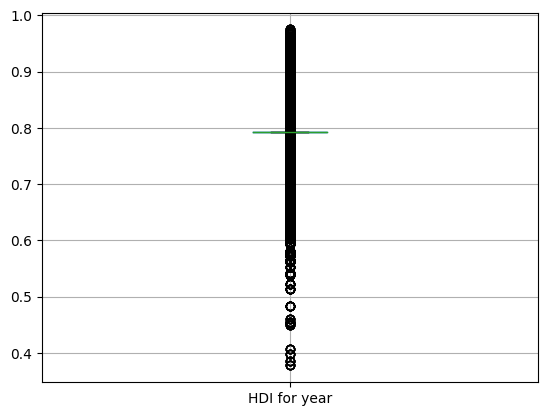

In [26]:
# Verificação de OUTLIERS para o atributo "HDI for year"
df.boxplot(['HDI for year']) 

In [27]:
# Seleção dos Quartis para o atributo "HDI for year"
Q1_IDH = df['HDI for year'].quantile(.25) 
Q3_IDH = df['HDI for year'].quantile(.75)
IIQ_IDH = Q3_IDH - Q1_IDH
limite_inferior_IDH = Q1_IDH - 1.5 * IIQ_IDH # Determinação de Limite Inferior.
limite_superior_IDH = Q3_IDH + 1.5 * IIQ_IDH # Determinação de Limite Superior.

In [28]:
selecao_HDI = (df['HDI for year'] >= limite_inferior_IDH) & (df['HDI for year'] <= limite_superior_IDH) # Exclusão dos valores fora dos limites.
IDH_SEM_OUTLIER = df[selecao_HDI]

<Axes: >

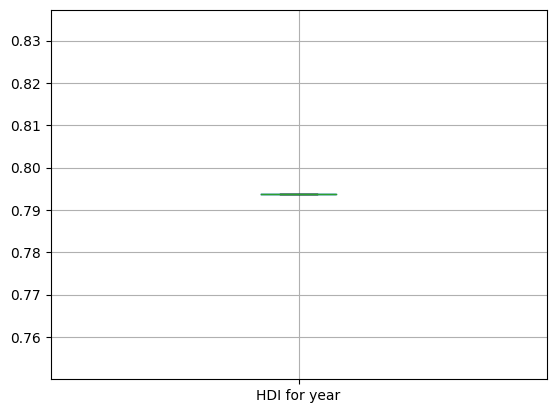

In [29]:
IDH_SEM_OUTLIER.boxplot(['HDI for year']) # Plot do atributo 'HDI FOR YEAR' sem OUTLIERS.

<Axes: >

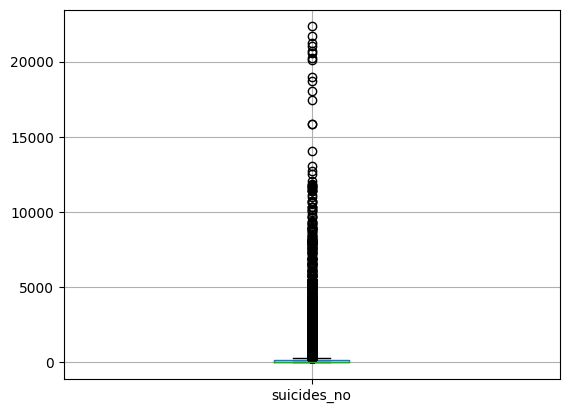

In [30]:
# Verificação de OUTLIERS para o atributo "suicides_no"
df.boxplot(['suicides_no']) 

In [31]:
 # Seleção dos Quartis para o atributo "suicides_no"
Q1_suicidios = df['suicides_no'].quantile(.25)
Q3_suicidios = df['suicides_no'].quantile(.75)
IIQ_suicidios = Q3_suicidios - Q1_suicidios
limite_inferior_suicidios = Q1_suicidios - 1.5 * IIQ_suicidios # Determinação de Limite Inferior.
limite_superior_suicidios = Q3_suicidios + 1.5 * IIQ_suicidios # Determinação de Limite Superior.

In [32]:
# Seleção dos dados sem OUTLIERS.
selecao_suicidios = (df['suicides_no'] >= limite_inferior_suicidios) & (df['suicides_no'] <= limite_superior_suicidios) # Exclusão dos valores fora dos limites.
SUICIDIOS_SEM_OUTLIER = df[selecao_suicidios]

<Axes: >

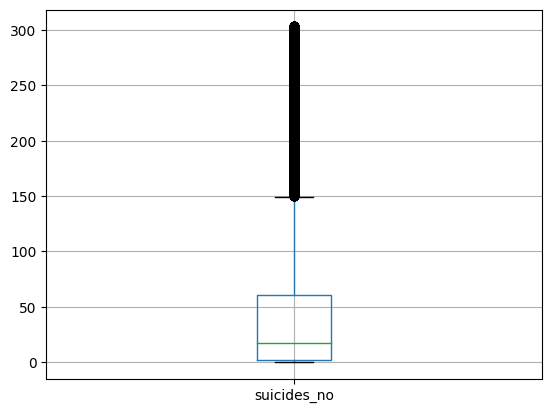

In [33]:
SUICIDIOS_SEM_OUTLIER.boxplot('suicides_no')

<Axes: >

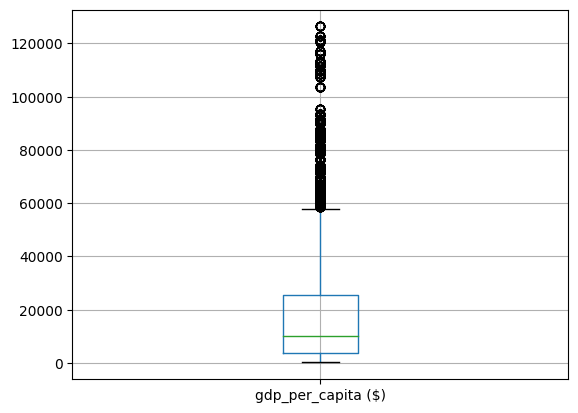

In [34]:
# Verificação de OUTLIERS para o atributo "gdp_per_capita ($)"
df.boxplot('gdp_per_capita ($)')

In [35]:
 # Seleção dos Quartis para o atributo "gdp_per_capita ($)"
Q1_GDP = df['gdp_per_capita ($)'].quantile(.25)
Q3_GDP = df['gdp_per_capita ($)'].quantile(.75)
IIQ_GDP = Q3_GDP - Q1_GDP
limite_inferior_GDP = Q1_GDP - 1.5 * IIQ_GDP
limite_superior_GDP = Q3_GDP + 1.5 * IIQ_GDP

In [36]:
# Seleção dos dados sem OUTLIERS.
selecao_gdp = (df['gdp_per_capita ($)'] >= limite_inferior_GDP ) & (df['gdp_per_capita ($)'] <= limite_superior_GDP) 
GDP_SEM_OUTLIERS = df[selecao_gdp]

<Axes: >

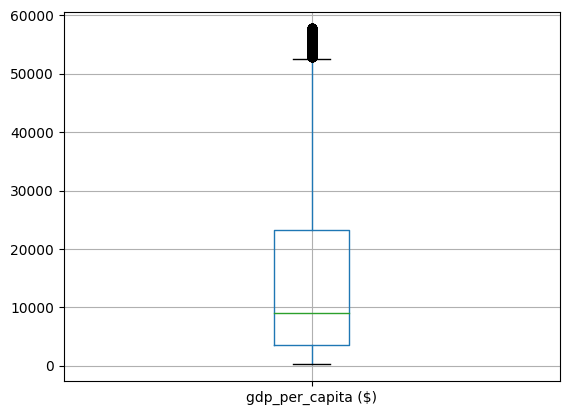

In [37]:
GDP_SEM_OUTLIERS.boxplot(['gdp_per_capita ($)'])

**Análise Multivariada** (Correlação)

In [38]:
# Correlação entre os atributos.
df.corr().applymap(lambda x:'{:.2f}'.format(x))

<ipython-input-38-2e0957ec07df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().applymap(lambda x:'{:.2f}'.format(x))


,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
suicides_no,1.00,0.05,0.27,0.05,0.06
population,0.05,1.00,-0.05,0.12,0.01
suicides/100k pop,0.27,-0.05,1.00,0.02,0.00
HDI for year,0.05,0.12,0.02,1.00,0.51
gdp_per_capita ($),0.06,0.01,0.00,0.51,1.00


#STORYTELLING

##SELEÇÃO BRAZIL

In [39]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,0.793666,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,0.793666,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,0.793666,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,0.793666,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,0.793666,"2,15,66,24,900",796.0,Boomers


In [40]:
brazil = df[(df['country'] == 'Brazil') & (df['year'] >= '1985' ) & (df['year'] <= '2015')]
brazil.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129.0,840300,15.35,Brazil1985,0.576,"2,22,94,27,90,435",1898.0,G.I. Generation
4173,Brazil,1985,male,55-74 years,535.0,5364900,9.97,Brazil1985,0.576,"2,22,94,27,90,435",1898.0,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011.0,11986300,8.43,Brazil1985,0.576,"2,22,94,27,90,435",1898.0,Silent
4175,Brazil,1985,male,25-34 years,791.0,10762900,7.35,Brazil1985,0.576,"2,22,94,27,90,435",1898.0,Boomers
4176,Brazil,1985,male,15-24 years,661.0,13834000,4.78,Brazil1985,0.576,"2,22,94,27,90,435",1898.0,Generation X


In [41]:
faixa_etaria = {'75+ years': 'F 75+ years','55-74 years': 'E 55-74 years','35-54 years': 'D 35-54 years','25-34 years':'C 25-34 years','15-24 years':'B 15-24 years','5-14 years':'A 5-14 years'}
brazil['age'] = brazil['age'].replace(faixa_etaria)


<ipython-input-41-0bac39942807>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil['age'] = brazil['age'].replace(faixa_etaria)


In [42]:
brazil['generation'].unique()

array(['G.I. Generation', 'Silent', 'Boomers', 'Generation X',
       'Millenials', 'Generation Z'], dtype=object)

In [43]:
generations = {'G.I. Generation': '1 G.I Generation', 'Silent': '2 Silent', 'Boomers': '3 Boomers', 'Generation X': '4 Generation X', 'Millenials': '5 Millenials', 'Generation Z': '6 Generation Z'}
brazil['generation'] = brazil['generation'].replace(generations)

<ipython-input-43-75db3cd4ad3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil['generation'] = brazil['generation'].replace(generations)


In [44]:
brazil['year'].value_counts()

1985    12
2001    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2004    12
2003    12
2002    12
2000    12
1986    12
1999    12
1998    12
1997    12
1996    12
1995    12
1994    12
1993    12
1992    12
1991    12
1990    12
1989    12
1988    12
1987    12
2015    12
Name: year, dtype: int64

In [45]:
brazil.shape

(372, 12)

In [46]:
brazil.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [47]:
brazil = brazil[['country','year','sex','age','suicides_no','population','gdp_per_capita ($)','generation']]
brazil.head(5)

,country,year,sex,age,suicides_no,population,gdp_per_capita ($),generation
4172,Brazil,1985,male,F 75+ years,129.0,840300,1898.0,1 G.I Generation
4173,Brazil,1985,male,E 55-74 years,535.0,5364900,1898.0,1 G.I Generation
4174,Brazil,1985,male,D 35-54 years,1011.0,11986300,1898.0,2 Silent
4175,Brazil,1985,male,C 25-34 years,791.0,10762900,1898.0,3 Boomers
4176,Brazil,1985,male,B 15-24 years,661.0,13834000,1898.0,4 Generation X


In [48]:
brazil_groupby_sexo = brazil.groupby(['year','sex']).sum()
brazil_groupby_sexo = brazil_groupby_sexo.reset_index()
brazil_groupby_sexo.head(5)

<ipython-input-48-0de4f6f75631>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brazil_groupby_sexo = brazil.groupby(['year','sex']).sum()


,year,sex,suicides_no,population,gdp_per_capita ($)
0,1985,female,1066.0,58996800,11388.0
1,1985,male,3162.0,58482100,11388.0
2,1986,female,1154.0,60498100,13542.0
3,1986,male,3117.0,58278300,13542.0
4,1987,female,1163.0,62069011,14364.0


In [49]:
brazil_groupby_ano = brazil.groupby('year').sum()
brazil_groupby_ano = brazil_groupby_ano.reset_index()
brazil_groupby_ano.head(5)

<ipython-input-49-2177006958ec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brazil_groupby_ano = brazil.groupby('year').sum()


,year,suicides_no,population,gdp_per_capita ($)
0,1985,4228.0,117478900,22776.0
1,1986,4271.0,118776400,27084.0
2,1987,4672.0,122822467,28728.0
3,1988,4466.0,125701294,31536.0
4,1989,4463.0,128570308,39720.0


In [50]:
brazil_groupby_idade = brazil.groupby(['age','sex']).sum()
brazil_groupby_idade = brazil_groupby_idade.reset_index()
brazil_groupby_idade.head(5)

<ipython-input-50-5895777dae0d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brazil_groupby_idade = brazil.groupby(['age','sex']).sum()


,age,sex,suicides_no,population,gdp_per_capita ($)
0,A 5-14 years,female,1399.0,524594200,188836.0
1,A 5-14 years,male,1630.0,542018626,188836.0
2,B 15-24 years,female,10877.0,504114228,188836.0
3,B 15-24 years,male,33720.0,512473767,188836.0
4,C 25-34 years,female,10065.0,450578751,188836.0


In [51]:
brazil_groupby_generation = brazil.groupby(['generation','sex']).sum()
brazil_groupby_generation = brazil_groupby_generation.reset_index()
brazil_groupby_generation.head(5)

<ipython-input-51-8db85751e2e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brazil_groupby_generation = brazil.groupby(['generation','sex']).sum()


,generation,sex,suicides_no,population,gdp_per_capita ($)
0,1 G.I Generation,female,1698.0,56939807,77139.0
1,1 G.I Generation,male,6113.0,45359902,77139.0
2,2 Silent,female,7570.0,306207768,253411.0
3,2 Silent,male,30071.0,261981386,253411.0
4,3 Boomers,female,14846.0,581093334,191150.0


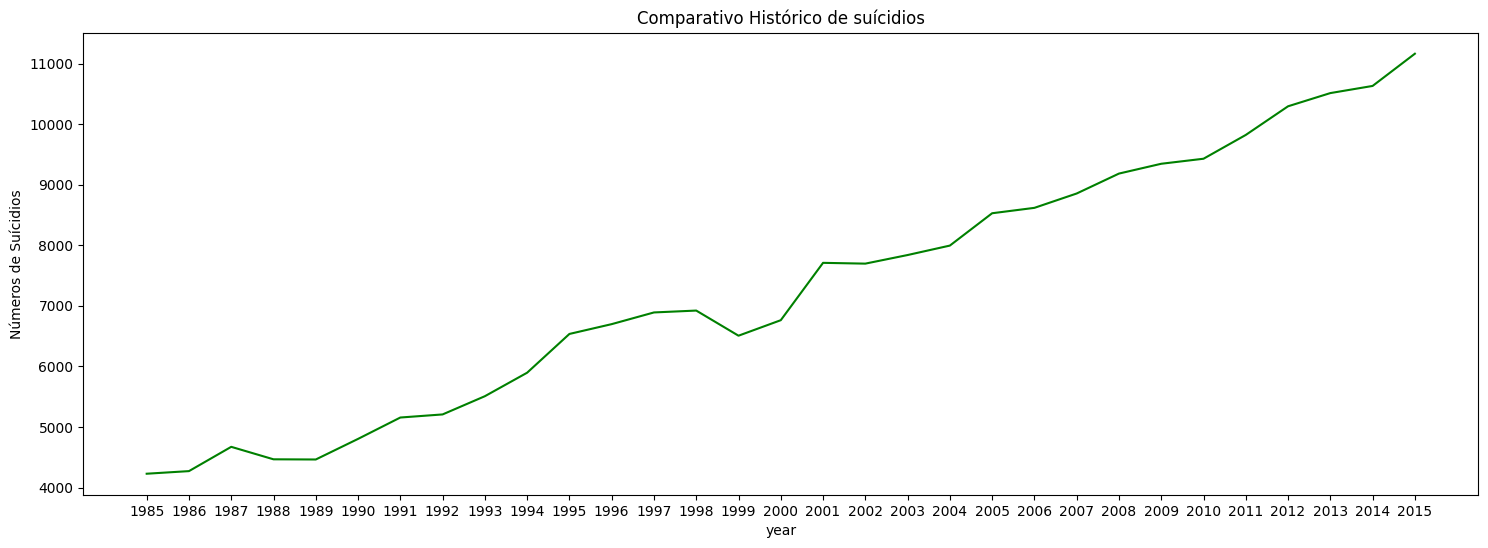

In [52]:
plt.figure(figsize=(18,6))
plt.title('Comparativo Histórico de suícidios')
sns.lineplot(x = 'year', y = 'suicides_no', data= brazil_groupby_ano.sort_values(by='year'),color = 'green')
plt.ylabel('Números de Suícidios')
plt.show()

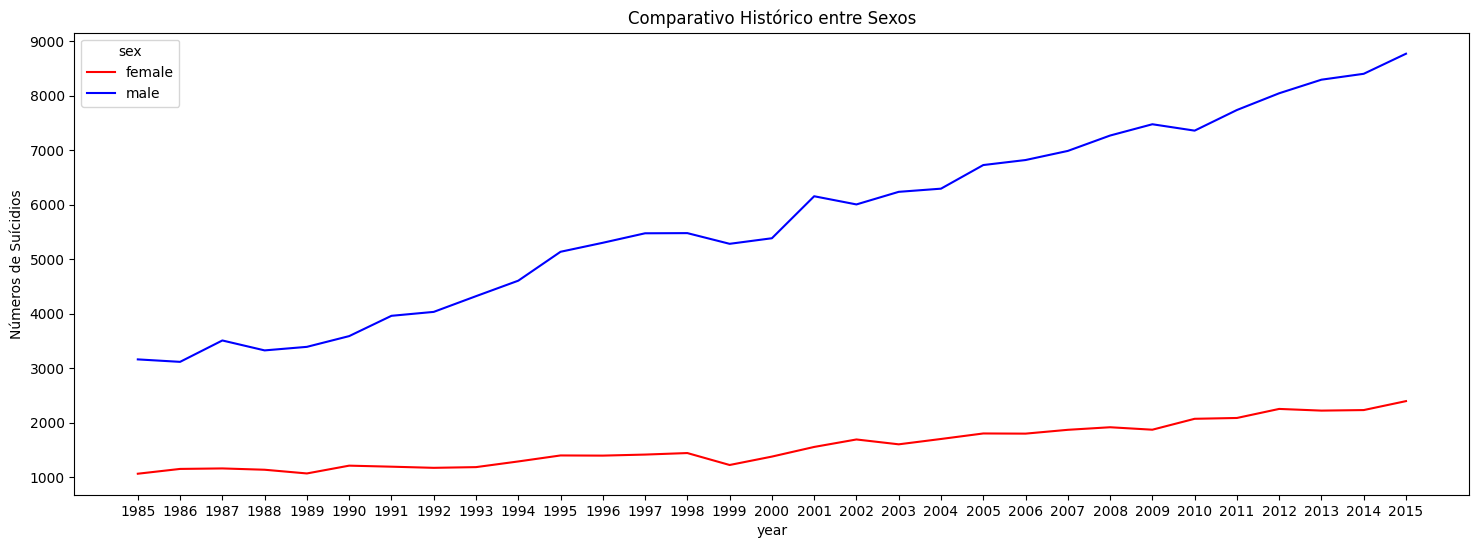

In [53]:
plt.figure(figsize=(18,6))
plt.title('Comparativo Histórico entre Sexos')
sns.lineplot(x = 'year', y = 'suicides_no', data= brazil_groupby_sexo.sort_values(by='year'), hue = 'sex',palette = ['r','b'])
plt.ylabel('Números de Suícidios')
plt.show()

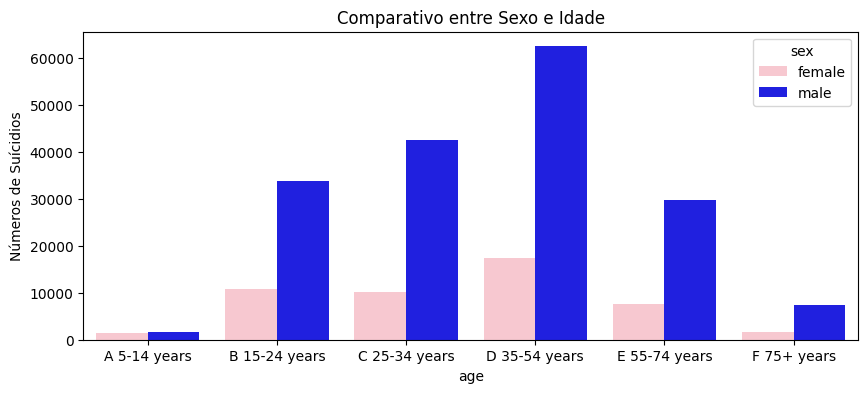

In [54]:
plt.figure(figsize=(10,4))
plt.title('Comparativo entre Sexo e Idade')
sns.barplot(x = 'age', y = 'suicides_no', data = brazil_groupby_idade.sort_values(by='age', ascending= True), hue = 'sex', palette = ['pink','blue'] )
plt.ylabel('Números de Suícidios')
plt.show()

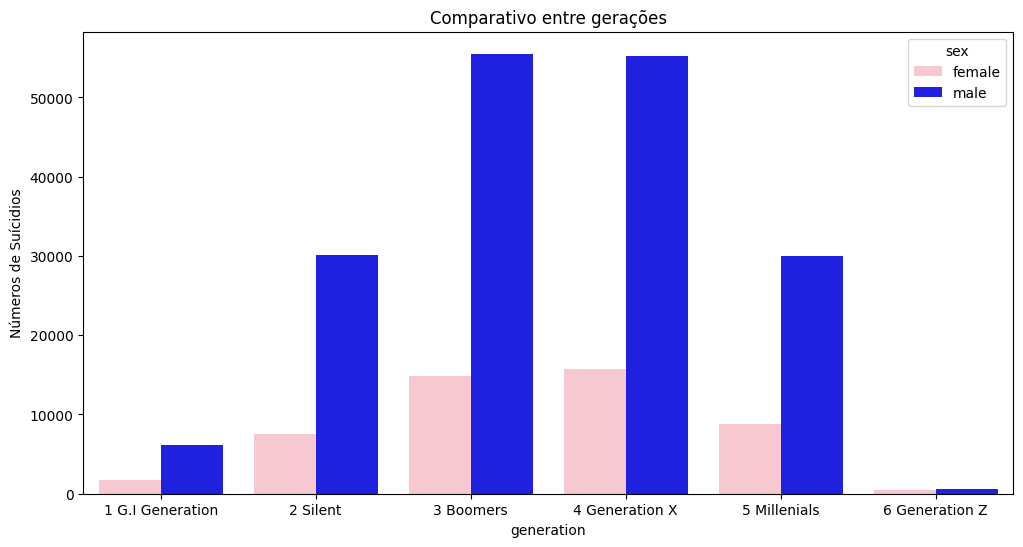

In [55]:
plt.figure(figsize=(12,6))
plt.title('Comparativo entre gerações')
sns.barplot(x = 'generation', y = 'suicides_no', data = brazil_groupby_generation, hue = 'sex', palette = ['pink','blue'] )
plt.ylabel('Números de Suícidios')
plt.show()

In [56]:
soma_populacao = brazil_groupby_generation.groupby('generation')['population'].sum()
print(soma_populacao)

generation
1 G.I Generation     102299709
2 Silent             568189154
3 Boomers           1129634233
4 Generation X      1486934613
5 Millenials        1269466122
6 Generation Z       299569717
Name: population, dtype: int64


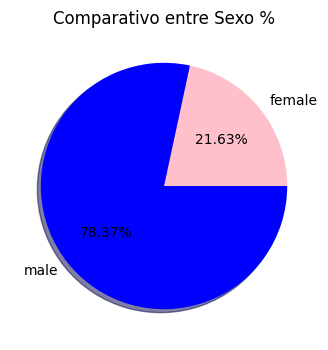

In [57]:
por_sexo = brazil.groupby('sex')['suicides_no'].sum()
plt.figure(figsize=(14,4))
plt.title('Comparativo entre Sexo %')
plt.pie(por_sexo, labels = por_sexo.index,autopct='%.2f%%', shadow=True, colors = ['pink', 'blue'])
plt.show()

<ipython-input-58-cc8aecdb9ae4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(brazil.corr())


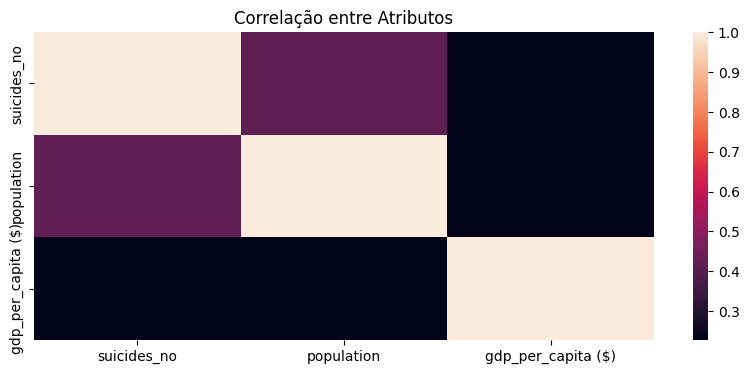

In [58]:
plt.figure(figsize=(10,4))
plt.title('Correlação entre Atributos')
sns.heatmap(brazil.corr())
plt.show()

## MUNDIAL

In [59]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,0.793666,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,0.793666,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,0.793666,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,0.793666,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,0.793666,"2,15,66,24,900",796.0,Boomers


In [60]:
df_mundial = df[(df['year'] >= '1985') & (df['year'] <= '2015')][['country','year','sex','age','suicides_no','gdp_per_capita ($)','generation','population']]
df_mundial.head(5)

,country,year,sex,age,suicides_no,gdp_per_capita ($),generation,population
0,Albania,1987,male,15-24 years,21.0,796.0,Generation X,312900
1,Albania,1987,male,35-54 years,16.0,796.0,Silent,308000
2,Albania,1987,female,15-24 years,14.0,796.0,Generation X,289700
3,Albania,1987,male,75+ years,1.0,796.0,G.I. Generation,21800
4,Albania,1987,male,25-34 years,9.0,796.0,Boomers,274300


In [61]:
df_mundial['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [62]:
faixa_etaria_mundial  = {'5-14 years': 'A 5-14 years', '15-24 years': 'B 15-24 years', '25-34 years': 'C 25-34 years', '35-54 years': 'D 35-54 years', '55-74 years':'E 55-74 years', '75+ years': 'F 75+ years' }
df_mundial['age'] = df_mundial['age'].replace(faixa_etaria_mundial)

In [63]:
generations = {'G.I. Generation': '1 G.I Generation', 'Silent': '2 Silent', 'Boomers': '3 Boomers', 'Generation X': '4 Generation X', 'Millenials': '5 Millenials', 'Generation Z': '6 Generation Z'}
df_mundial['generation'] = df_mundial['generation'].replace(generations)

In [64]:
df_mundial['age'].unique()

array(['B 15-24 years', 'D 35-54 years', 'F 75+ years', 'C 25-34 years',
       'E 55-74 years', 'A 5-14 years'], dtype=object)

In [65]:
df_mundial['country'].value_counts()

Brazil                    372
Iceland                   372
Italy                     372
Colombia                  372
Chile                     372
                         ... 
Oman                       36
Bosnia and Herzegovina     24
Dominica                   12
Macau                      12
Cabo Verde                 12
Name: country, Length: 100, dtype: int64

In [66]:
df_mundial_ano = df_mundial.groupby('year').sum()
df_mundial_ano.reset_index(inplace = True)
df_mundial_ano.head()

<ipython-input-66-caf368625fe7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mundial_ano = df_mundial.groupby('year').sum()


,year,suicides_no,gdp_per_capita ($),population
0,1985,116063.0,3508548.0,1008600086
1,1986,120670.0,4104636.0,1029909613
2,1987,126842.0,5645760.0,1095029726
3,1988,121026.0,5870508.0,1054094424
4,1989,160244.0,6068424.0,1225514347


In [67]:
df_mundial_ano_sexo = df_mundial.groupby(['year','sex']).sum()
df_mundial_ano_sexo.reset_index(inplace = True)
df_mundial_ano_sexo.head(5)

<ipython-input-67-a163deb6ea0e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mundial_ano_sexo = df_mundial.groupby(['year','sex']).sum()


,year,sex,suicides_no,gdp_per_capita ($),population
0,1985,female,32479.0,1754274.0,513013055
1,1985,male,83584.0,1754274.0,495587031
2,1986,female,33852.0,2052318.0,524465866
3,1986,male,86818.0,2052318.0,505443747
4,1987,female,35006.0,2822880.0,559183789


In [68]:
df_mundial_age = df_mundial.groupby(['age','sex']).sum()
df_mundial_age.reset_index(inplace = True)
df_mundial_age.head(5)

<ipython-input-68-38653df378dd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mundial_age = df_mundial.groupby(['age','sex']).sum()


,age,sex,suicides_no,gdp_per_capita ($),population
0,A 5-14 years,female,16997.0,38759885.0,4107939076
1,A 5-14 years,male,35267.0,38759885.0,4290754161
2,B 15-24 years,female,175199.0,38759885.0,4235352894
3,B 15-24 years,male,632148.0,38759885.0,4387297664
4,C 25-34 years,female,208450.0,38759885.0,4179617213


In [69]:
df_mundial_generation = df_mundial.groupby(['generation','sex']).sum()
df_mundial_generation.reset_index(inplace = True)
df_mundial_generation.head()

<ipython-input-69-7264fea3147a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mundial_generation = df_mundial.groupby(['generation','sex']).sum()


,generation,sex,suicides_no,gdp_per_capita ($),population
0,1 G.I Generation,female,176653.0,14259755.0,1273832910
1,1 G.I Generation,male,333356.0,14259755.0,852369814
2,2 Silent,female,471747.0,55563520.0,5070872681
3,2 Silent,male,1308140.0,55563520.0,4139694667
4,3 Boomers,female,459849.0,39464442.0,6770410015


In [70]:
df_mundial_pais = df_mundial.groupby('country').sum()
df_mundial_pais.reset_index(inplace = True)
mundial_top10 = df_mundial_pais.sort_values('suicides_no', ascending= False)[0:10]
mundial_top10['suicidios/100k'] = (mundial_top10['suicides_no'] / 100000).round()
mundial_top10.head()

<ipython-input-70-f7c9ecf665d8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mundial_pais = df_mundial.groupby('country').sum()


,country,suicides_no,gdp_per_capita ($),population,suicidios/100k
74,Russian Federation,1209742.0,2112096.0,3690802620,12.0
97,United States,1034013.0,14608296.0,8054027201,10.0
46,Japan,806902.0,13539888.0,3681024844,8.0
33,France,329127.0,11333328.0,1670756775,3.0
94,Ukraine,319950.0,627492.0,1286469184,3.0


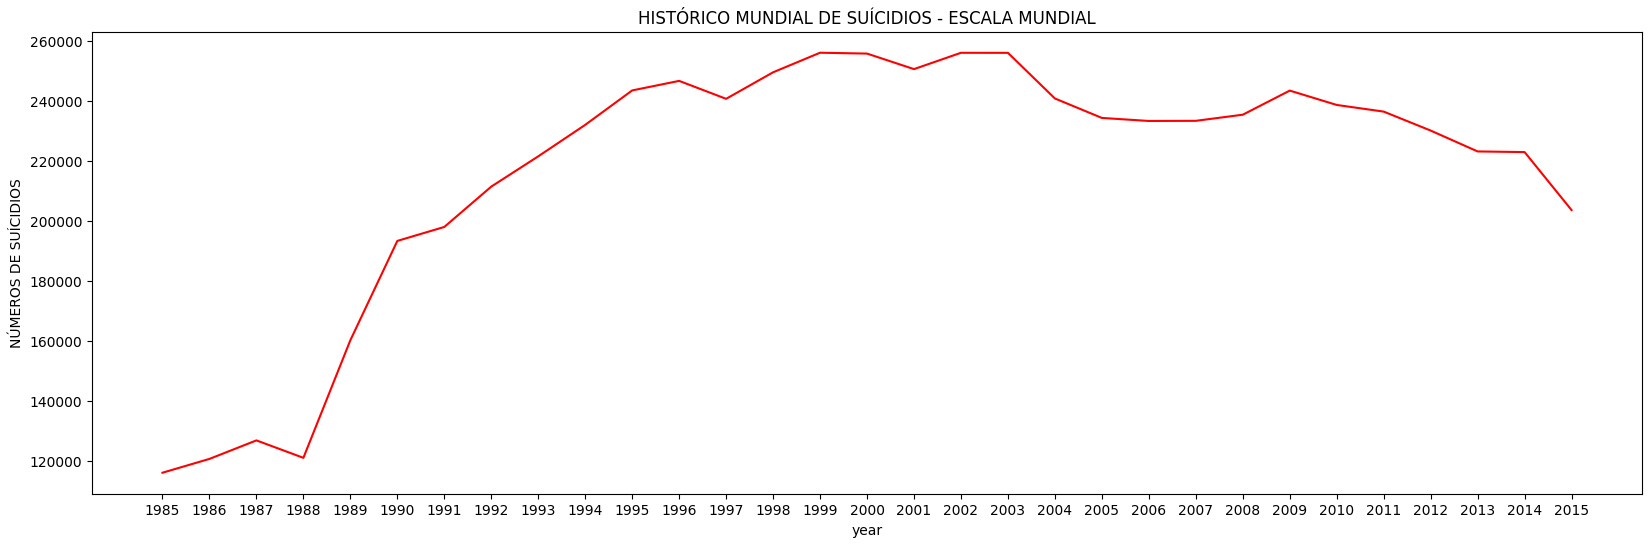

In [71]:
plt.figure(figsize=(20,6))
plt.title('HISTÓRICO MUNDIAL DE SUÍCIDIOS - ESCALA MUNDIAL', )
sns.lineplot(x = 'year', y = 'suicides_no', data = df_mundial_ano.sort_values(by='year'),color = 'red' )
plt.ylabel('NÚMEROS DE SUÍCIDIOS')
plt.show()

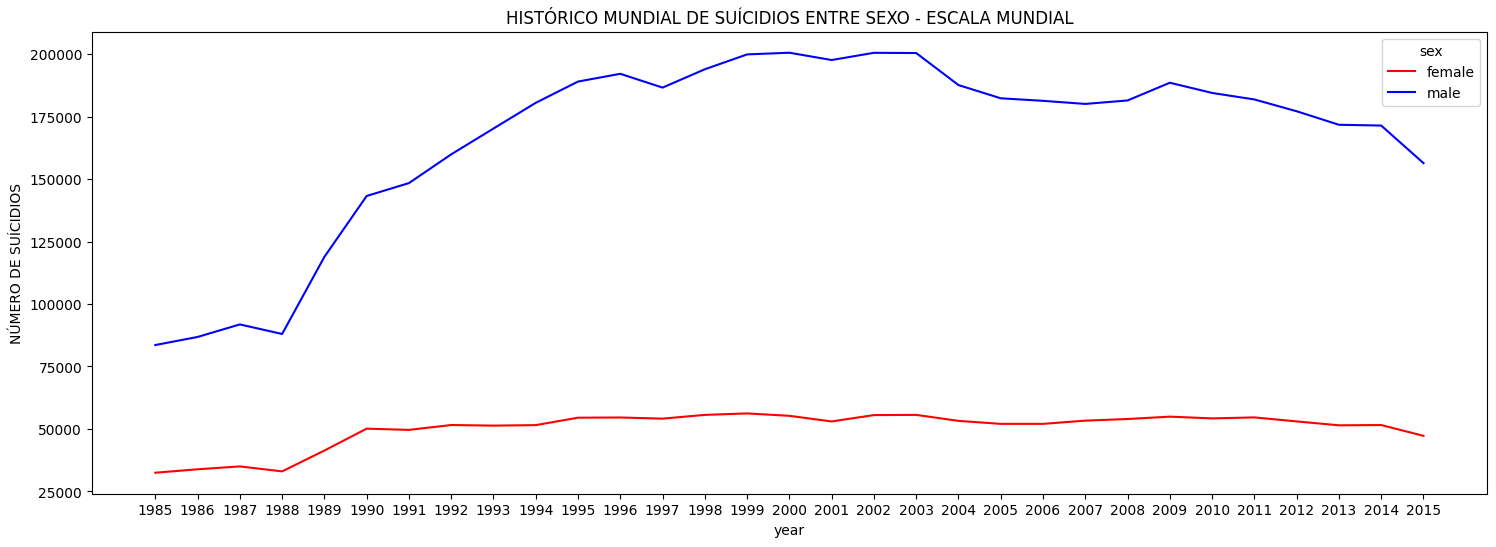

In [72]:
plt.figure(figsize = (18,6))
sns.lineplot(x = 'year', y = 'suicides_no', data = df_mundial_ano_sexo.sort_values(by='year'), hue ='sex',palette = ['red','blue'])
plt.title('HISTÓRICO MUNDIAL DE SUÍCIDIOS ENTRE SEXO - ESCALA MUNDIAL')
plt.ylabel('NÚMERO DE SUÍCIDIOS')
plt.show()

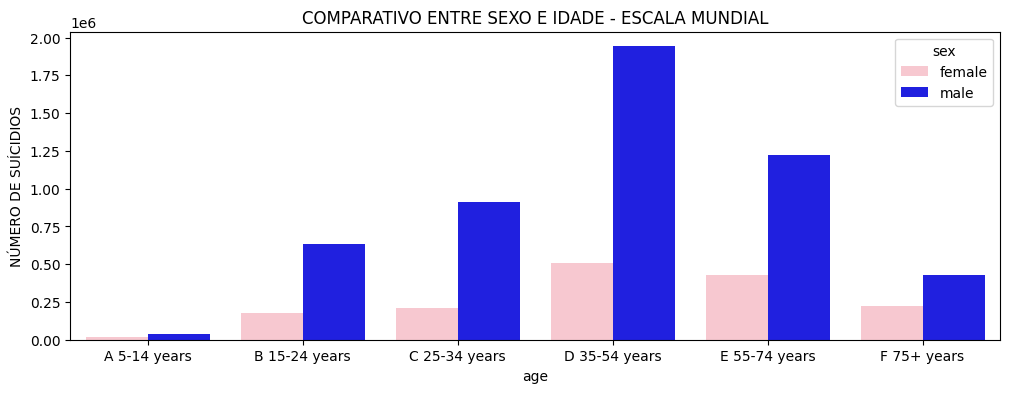

In [73]:
plt.figure(figsize = (12,4))
sns.barplot(x= 'age', y = 'suicides_no', data = df_mundial_age.sort_values(by='age', ascending= True), hue = 'sex', palette = ['pink','blue'])
plt.ylabel('NÚMERO DE SUÍCIDIOS')
plt.title('COMPARATIVO ENTRE SEXO E IDADE - ESCALA MUNDIAL')
plt.show()

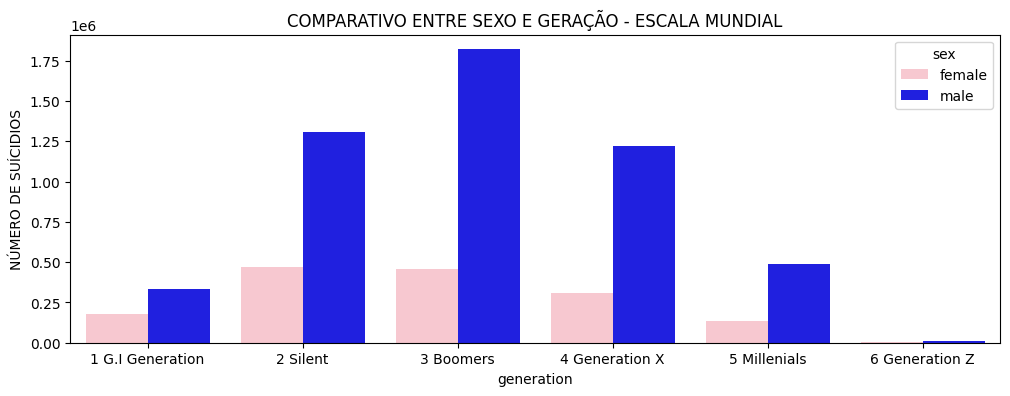

In [74]:
plt.figure(figsize = (12,4))
sns.barplot(x= 'generation', y = 'suicides_no', data = df_mundial_generation.sort_values(by='generation', ascending= True), hue = 'sex', palette = ['pink','blue'])
plt.ylabel('NÚMERO DE SUÍCIDIOS')
plt.title('COMPARATIVO ENTRE SEXO E GERAÇÃO - ESCALA MUNDIAL')
plt.show()

In [77]:
soma_populacao2 = df_mundial_generation.groupby('generation')['population'].sum()
print(soma_populacao2)

generation
1 G.I Generation     2126202724
2 Silent             9210567348
3 Boomers           13318427149
4 Generation X      13424794317
5 Millenials        10606523160
6 Generation Z       2503541842
Name: population, dtype: int64


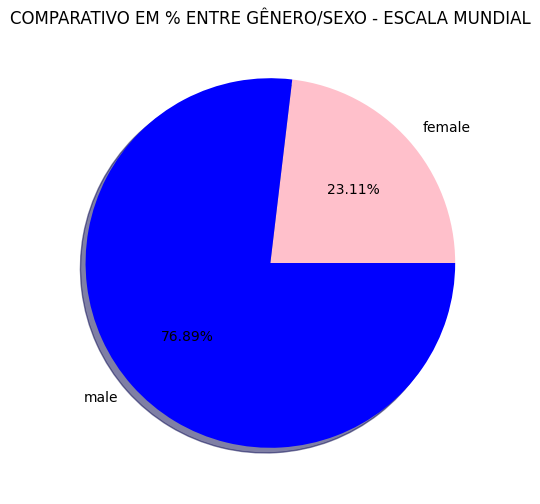

In [75]:
por_sexo_mundial = df_mundial.groupby('sex')['suicides_no'].sum()
plt.figure(figsize = (12,6))
plt.pie(por_sexo_mundial, labels = por_sexo_mundial.index,autopct='%.2f%%', shadow = True,colors= ['pink','blue'] )
plt.title('COMPARATIVO EM % ENTRE GÊNERO/SEXO - ESCALA MUNDIAL')
plt.show()

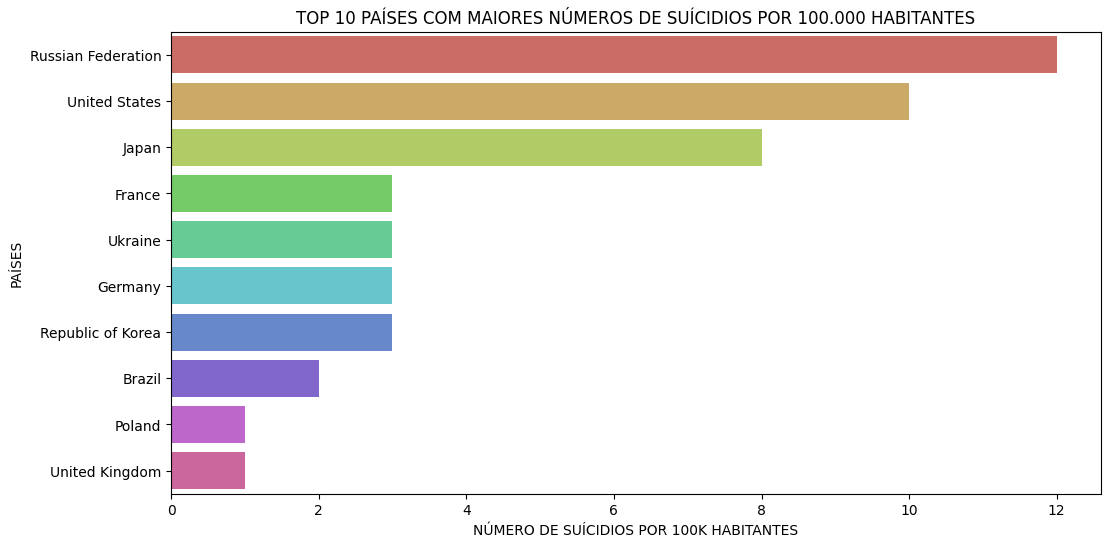

In [76]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'suicidios/100k', y = 'country', data = mundial_top10, orient = 'h', palette= "hls" )
plt.title('TOP 10 PAÍSES COM MAIORES NÚMEROS DE SUÍCIDIOS POR 100.000 HABITANTES')
plt.ylabel('PAÍSES')
plt.xlabel('NÚMERO DE SUÍCIDIOS POR 100K HABITANTES')
plt.show()